<img src="./unal.png" align=left width="150" height="150"></img>



$\,$
---

<h2 align="center">TABLAS DE CONTINGENCIA</h2>



$\;$

---

In [50]:
require(FactoClass)
data(admi)

tc<-table( admi$edad , admi$estr );tc               
tabtc <-cbind (tc , totF = rowSums (tc)) ;tabtc       #Tabla de perfiles
tabtc <-rbind (tabtc , totC = colSums ( tabtc )) ;tabtc 
round( tabtc / 445* 100 ,1)                           #Tabla frecuencias relativas
#xtable ( cbind(tabtc , round ( tabtc / 445* 100 ,1)),digits =c( rep (0 ,5) ,rep (1 ,4)))



      
       bajo medio alto
  a16m   44    47   27
  a17    58    74   39
  a18    22    26    8
  a19M   55    38    7

,bajo,medio,alto,totF
a16m,44,47,27,118
a17,58,74,39,171
a18,22,26,8,56
a19M,55,38,7,100


,bajo,medio,alto,totF
a16m,44,47,27,118
a17,58,74,39,171
a18,22,26,8,56
a19M,55,38,7,100
totC,179,185,81,445


,bajo,medio,alto,totF
a16m,9.9,10.6,6.1,26.5
a17,13.0,16.6,8.8,38.4
a18,4.9,5.8,1.8,12.6
a19M,12.4,8.5,1.6,22.5
totC,40.2,41.6,18.2,100.0


In [51]:

#----------------------------------
# Perfil fila y columna
#----------------------------------
prop.table(tc ,1) ->pf;pf         # perfiles fila
prop.table (tc ,2) ->pc;pc       # perfiles columna
#xtable(addmargins (pf , margin =2)*100 , digits = rep (1 ,5))
#xtable( addmargins (pc , margin =1)*100 , digits = rep (1 ,4))



      
            bajo     medio      alto
  a16m 0.3728814 0.3983051 0.2288136
  a17  0.3391813 0.4327485 0.2280702
  a18  0.3928571 0.4642857 0.1428571
  a19M 0.5500000 0.3800000 0.0700000

      
             bajo      medio       alto
  a16m 0.24581006 0.25405405 0.33333333
  a17  0.32402235 0.40000000 0.48148148
  a18  0.12290503 0.14054054 0.09876543
  a19M 0.30726257 0.20540541 0.08641975

Var1,Var2,Freq
a16m,bajo,44
a17,bajo,58
a18,bajo,22
a19M,bajo,55
a16m,medio,47
a17,medio,74
a18,medio,26
a19M,medio,38
a16m,alto,27
a17,alto,39


 'table' int [1:4, 1:3] 44 58 22 55 47 74 26 38 27 39 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:4] "a16m" "a17" "a18" "a19M"
  ..$ : chr [1:3] "bajo" "medio" "alto"


ERROR: Error in ok_device(filename, ...): demasiados dispositivos abiertos


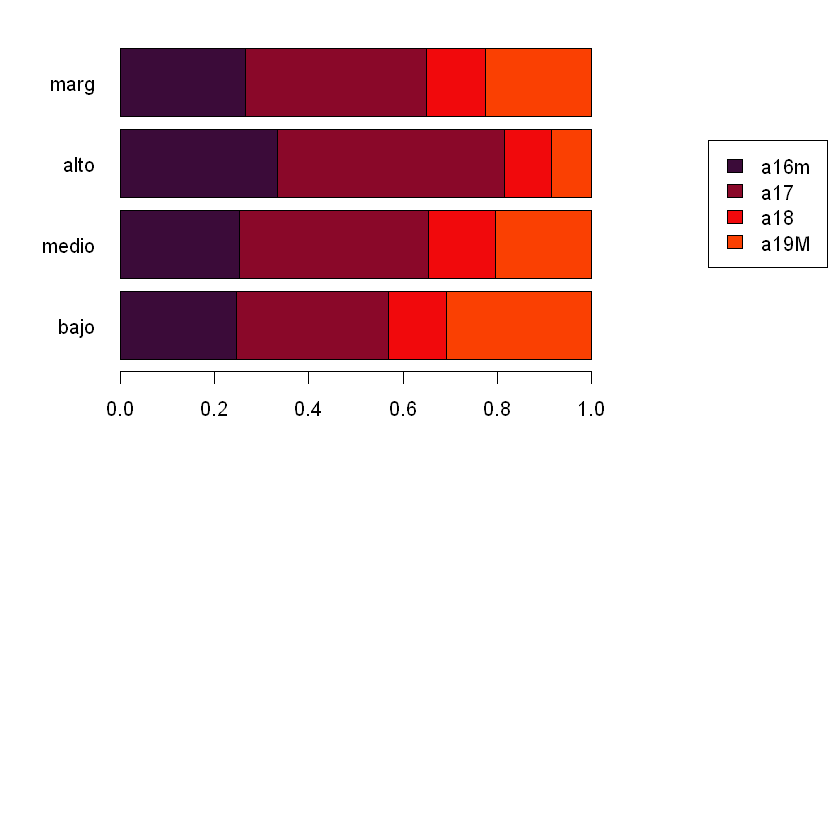

In [56]:

#----------------------------------
# GrÃ¡fica
#----------------------------------
data.frame(tc[,1:3])
str(tc)

par(mfrow=c(2 ,1) , mai =c (0.4 ,1 ,0.3 ,0.1) )
plotct(t(tc),col=c("#3B0B39",  "#8A0829", "#F1090C", "#FA4002", "#F4A405","#FFFF00"))


ERROR: Error in ok_device(filename, ...): demasiados dispositivos abiertos


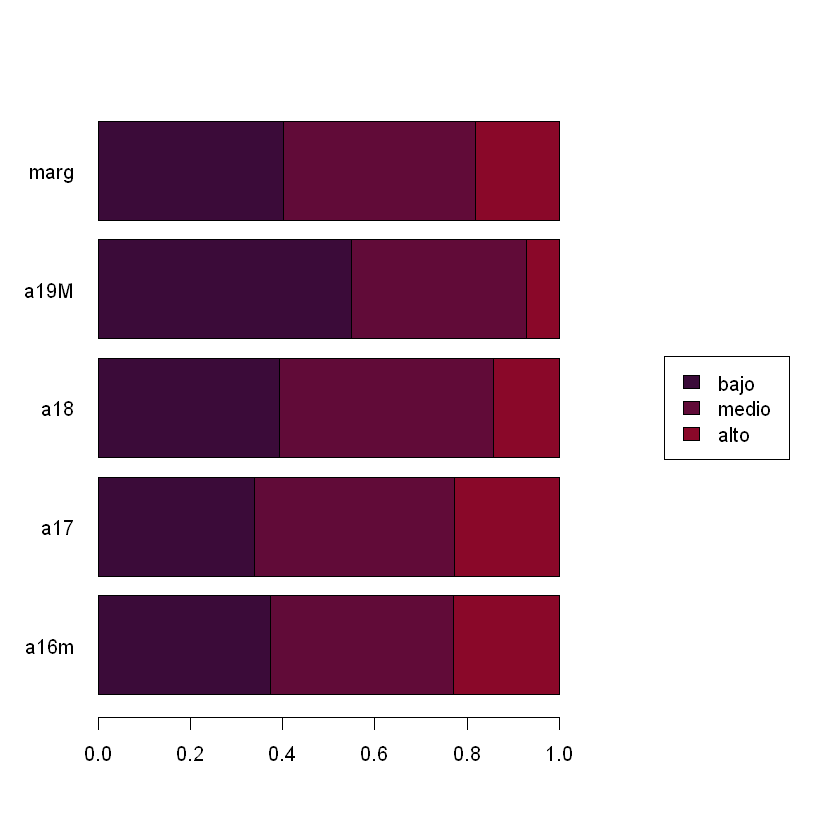

In [57]:
plotct(tc ,profiles="both",col=c("#3B0B39", "#610B38", "#8A0829", "#F1090C", "#FA4002", "#F4A405","#FFFF00"))


ERROR: Error in ok_device(filename, ...): demasiados dispositivos abiertos


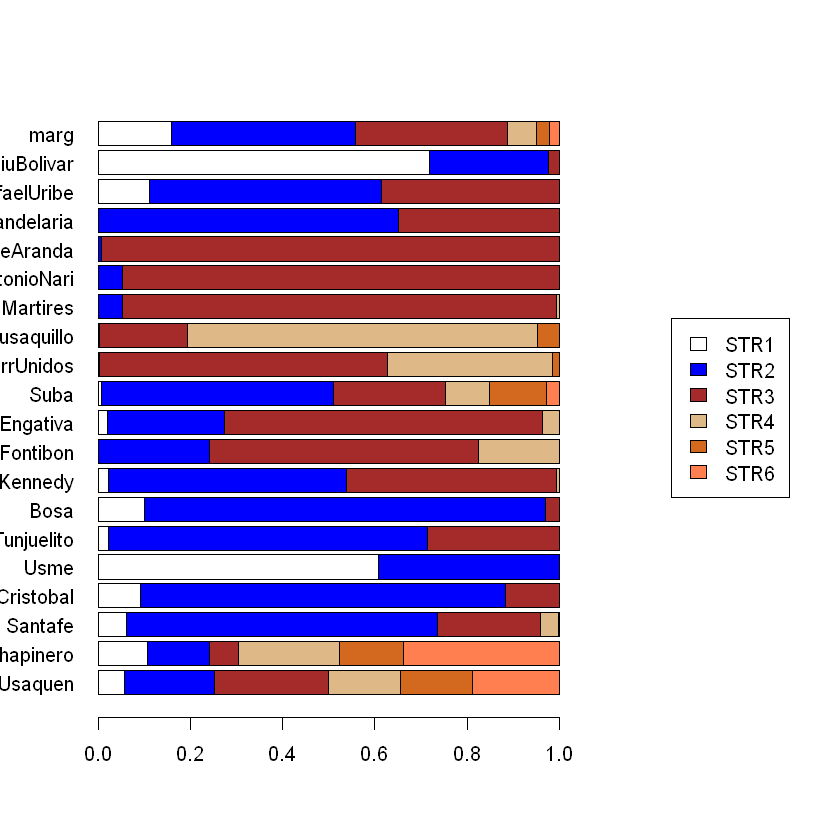

In [54]:
mycolors<-colors()[c(1,26,32,37,52,57,68,73,74,81,82,84,88,100)]
data(Bogota)
plotct(Bogota[,2:7],col=mycolors)
# return tables with marginals
tabs <- plotct(Bogota[,2:7],col=mycolors,tables=TRUE,nd=0)

ERROR: Error in ok_device(filename, ...): demasiados dispositivos abiertos


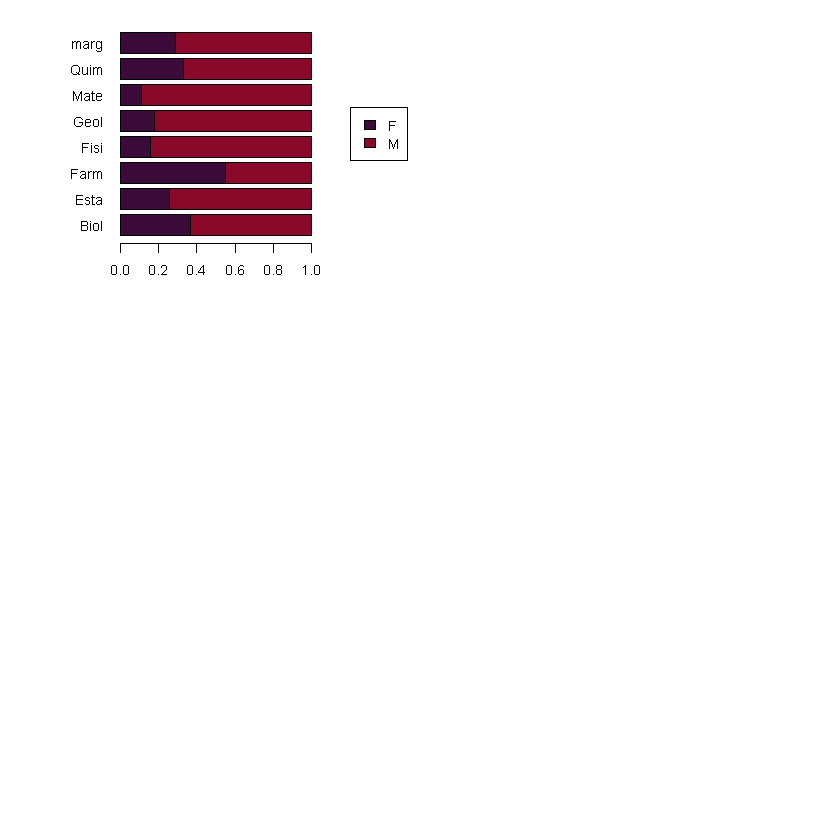

In [47]:
#x11()
par( mfrow =c(3 ,2),mai =c(0.3 ,1 ,0.2 ,0.1) ,las =1, cex =0.7)
mycolors <-c("#3B0B39",  "#8A0829", "#F1090C", "#FA4002", "#F4A405","#FFFF00")
for (i in 8:13) {
  tc <- unclass( table (admi$carr , admi[,i]))
  plotct(tc,col= mycolors , legend.text = TRUE )
  title ( main = names(admi)[i], cex.main =0.7)
}

#### Prueba Chi-cuadrado

In [6]:
#----------------------------------
# Prueba Chi-cuadrado
# Medida de asociacion entre variables cuantitativas
#----------------------------------
chisq.carac(admi[,8:11],admi$carr,decr = FALSE)
xtable(chisq.carac(admi[,8:11],admi$carr,decr = FALSE),digits=c(0,1,0,3,3,3))


,chi2,dfr,pval,tval,phi2
gene,44.108034,6,7.036257e-08,5.2642992,0.09911918
estr,29.190003,12,3.691872e-03,2.6790224,0.06559551
orig,9.676163,12,6.443468e-01,-0.3701022,0.02174419
edad,33.553436,18,1.429273e-02,2.1891565,0.07540098


,chi2,dfr,pval,tval,phi2
gene,44.108034,6,7.036257e-08,5.2642992,0.09911918
estr,29.190003,12,3.691872e-03,2.6790224,0.06559551
orig,9.676163,12,6.443468e-01,-0.3701022,0.02174419
edad,33.553436,18,1.429273e-02,2.1891565,0.07540098


In [16]:

#Ordenamiento por valores test para describir una variable cualitativa
#segÃºn las categorÃ­as de varias variables cualitativas
desCarrSocio<-cluster.carac(admi[,8:13],admi[,1]); desCarrSocio
xtable(list.to.data(desCarrSocio),digits=c(0,0,3,3,1,1,1,0))



class: Biol
          Test.Value p.Value Class.Cat Cat.Class Global Weight
niMa.siMa      3.332   0.001      17.5      87.3   70.8    315
niMa.noMa     -3.332   0.001       6.2      12.7   29.2    130
------------------------------------------------------------ 
class: Esta
          Test.Value p.Value Class.Cat Cat.Class Global Weight
niLE.siLE      2.235   0.025      26.1      18.2   10.3     46
niMa.siMa      2.034   0.042      16.8      80.3   70.8    315
niMa.noMa     -2.034   0.042      10.0      19.7   29.2    130
niLE.noLE     -2.235   0.025      13.5      81.8   89.7    399
------------------------------------------------------------ 
class: Farm
          Test.Value p.Value Class.Cat Cat.Class Global Weight
gene.F         5.152   0.000      31.2      54.8   28.8    128
niMa.siMa      4.355   0.000      21.0      90.4   70.8    315
edad.a18       2.252   0.024      26.8      20.5   12.6     56
estr.alto     -2.281   0.023       8.6       9.6   18.2     81
niMa.noMa     -4.355 

,clasif,Test.Value,p.Value,Class.Cat,Cat.Class,Global,Weight
niMa.siMa,Biol,3.332,0.001,17.5,87.3,70.8,315
niMa.noMa,Biol,-3.332,0.001,6.2,12.7,29.2,130
niLE.siLE,Esta,2.235,0.025,26.1,18.2,10.3,46
niMa.siMa1,Esta,2.034,0.042,16.8,80.3,70.8,315
niMa.noMa1,Esta,-2.034,0.042,10.0,19.7,29.2,130
niLE.noLE,Esta,-2.235,0.025,13.5,81.8,89.7,399
gene.F,Farm,5.152,0.000,31.2,54.8,28.8,128
niMa.siMa2,Farm,4.355,0.000,21.0,90.4,70.8,315
edad.a18,Farm,2.252,0.024,26.8,20.5,12.6,56
estr.alto,Farm,-2.281,0.023,8.6,9.6,18.2,81


In [17]:

#TC de nivela-MatemÃ¡ticas vs carreras y tablas de perfiles fila y columna,
#incluyendo marginales
tcCarrNiMa <- unclass( table( admi$niMa , admi$ carr ))
tabs <- plotct( tcCarrNiMa , tables = TRUE )
xtable( tabs $ctm , digits = rep (0 ,9))
xtable( tabs $ctm *100/445 , digits = rep (1 ,9))
xtable( tabs $perR , digits = rep (1 ,8))
xtable( tabs $perC , digits = rep (1 ,9))


,Biol,Esta,Farm,Fisi,Geol,Mate,Quim,marR
siMa,55,53,66,45,24,23,49,315
noMa,8,13,7,37,21,30,14,130
marC,63,66,73,82,45,53,63,445


,Biol,Esta,Farm,Fisi,Geol,Mate,Quim,marR
siMa,12.359551,11.910112,14.831461,10.112360,5.393258,5.168539,11.011236,70.78652
noMa,1.797753,2.921348,1.573034,8.314607,4.719101,6.741573,3.146067,29.21348
marC,14.157303,14.831461,16.404494,18.426966,10.112360,11.910112,14.157303,100.00000


,Biol,Esta,Farm,Fisi,Geol,Mate,Quim
siMa,17.5,16.8,21.0,14.3,7.6,7.3,15.6
noMa,6.2,10.0,5.4,28.5,16.2,23.1,10.8
marg,14.2,14.8,16.4,18.4,10.1,11.9,14.2


,Biol,Esta,Farm,Fisi,Geol,Mate,Quim,marg
siMa,87.3,80.3,90.4,54.9,53.3,43.4,77.8,70.8
noMa,12.7,19.7,9.6,45.1,46.7,56.6,22.2,29.2


In [18]:
#calcular el valor p y el valor test
vp <- phyper(54 , 315 , 130 ,63 , lower.tail = FALSE );vp
qnorm(vp/2, lower.tail = FALSE )



[1] 0.000862394

[1] 3.331951